In [1]:
# Install required packages
!pip install kaggle pandas-profiling plotly

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 11.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=7528cbe0e37f7e1469072a84fbbb8b92e5bac3842627f5ab7631db4446f82612
  Stored in directory: /root/.cache/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.3
    Uninstalling MarkupSafe-3.0.3:
      Successfully uninstalled MarkupSafe-3.0.3
  Attempting uninstall: 

In [2]:
# Setup Kaggle API (you'll need to upload your kaggle.json file first)
import os
from google.colab import files

# Upload kaggle.json file
uploaded = files.upload()

# Create kaggle directory and move the file
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download Students Performance dataset
!kaggle datasets download -d sankha1998/student-performance-data

# Unzip the files
!unzip student-performance-data.zip

Saving StudentsPerformance.csv to StudentsPerformance.csv
Saving test.csv to test.csv
Saving train.csv to train.csv
mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open student-perf

In [3]:
# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

# Display first few rows
train_df.head()

Training set shape: (800, 8)
Test set shape: (200, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,female,group D,master's degree,standard,none,70,75,62
1,female,group C,bachelor's degree,free/reduced,completed,83,83,66
2,female,group D,some college,free/reduced,none,89,86,79
3,male,group C,master's degree,free/reduced,none,67,66,61
4,male,group E,high school,standard,none,64,57,73


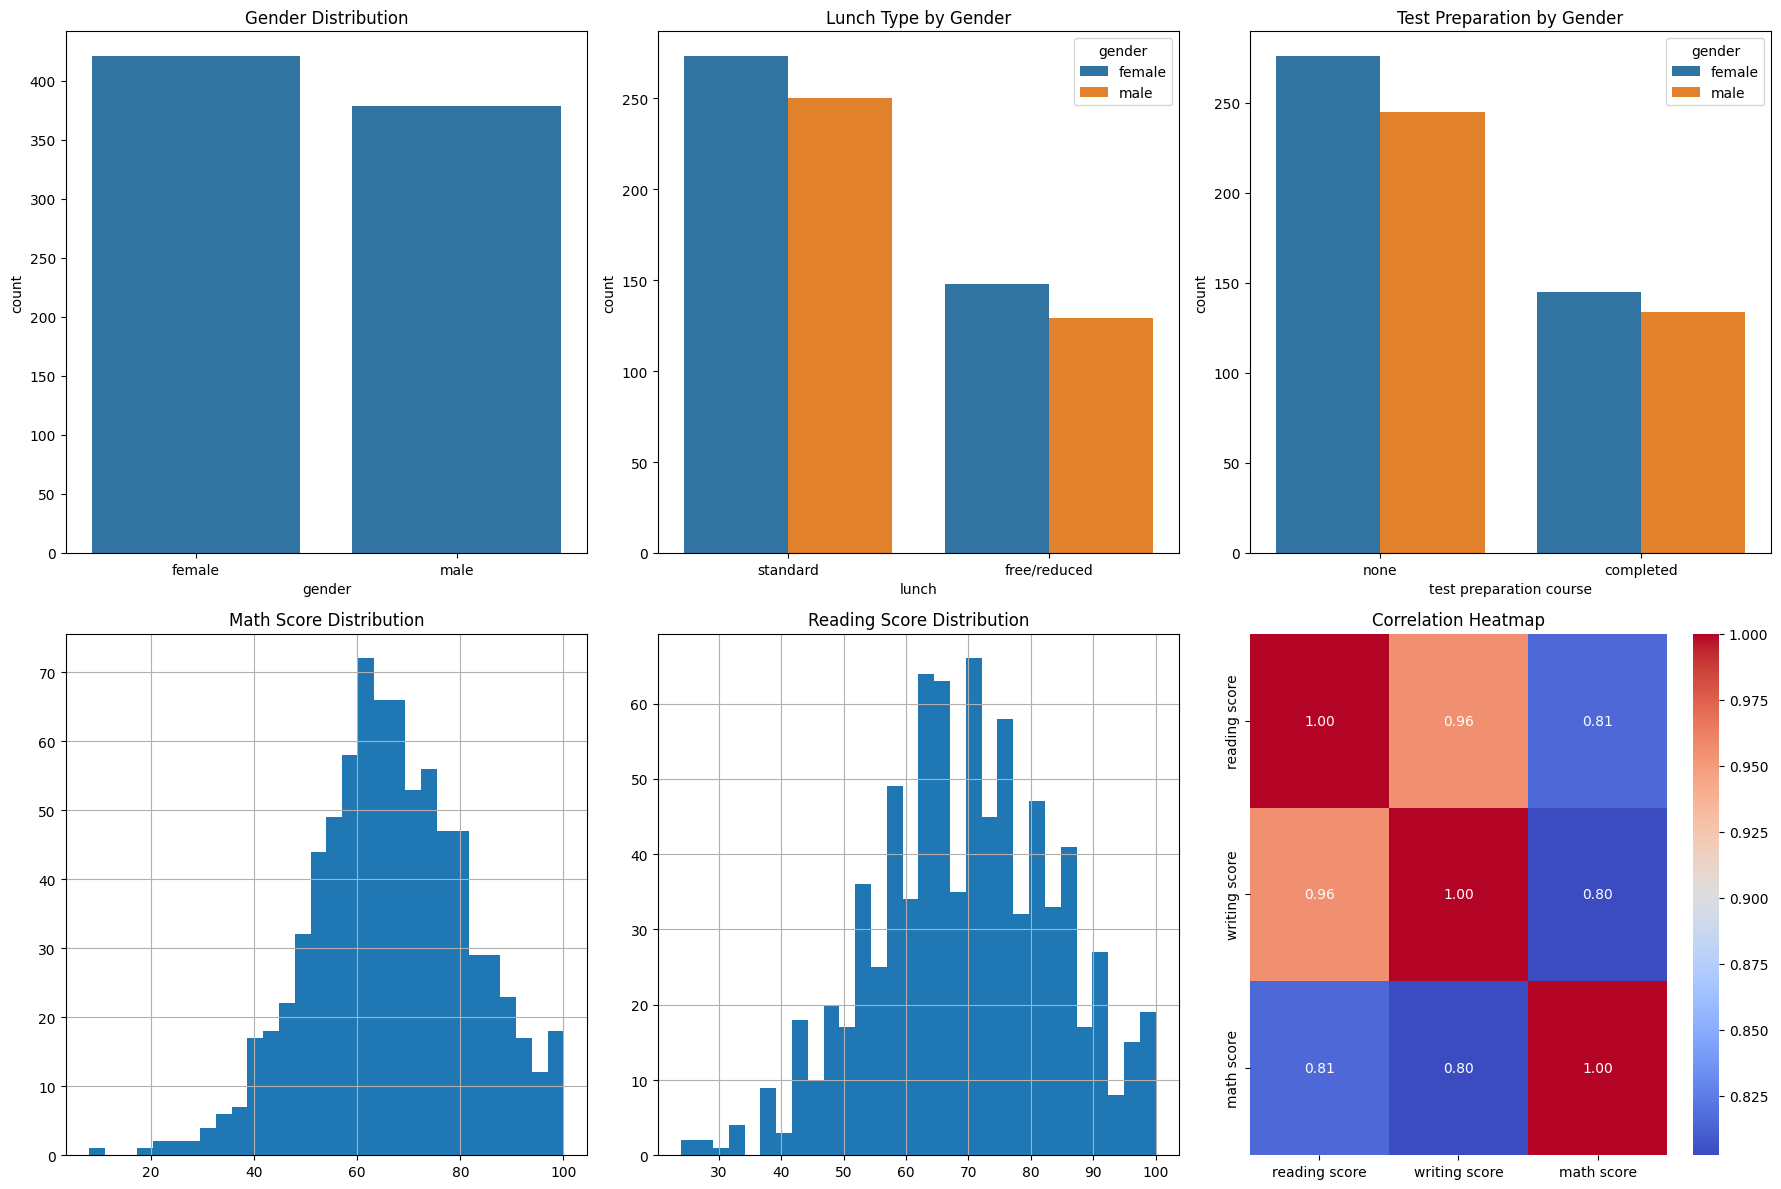

In [4]:
# Visualize the data
plt.figure(figsize=(18, 12))

# Subplot 1: Gender distribution
plt.subplot(2, 3, 1)
sns.countplot(data=train_df, x='gender')
plt.title('Gender Distribution')

# Subplot 2: Performance by lunch type
plt.subplot(2, 3, 2)
sns.countplot(data=train_df, x='lunch', hue='gender')
plt.title('Lunch Type by Gender')

# Subplot 3: Performance by test preparation
plt.subplot(2, 3, 3)
sns.countplot(data=train_df, x='test preparation course', hue='gender')
plt.title('Test Preparation by Gender')

# Subplot 4: Math score distribution
plt.subplot(2, 3, 4)
train_df['math score'].hist(bins=30)
plt.title('Math Score Distribution')

# Subplot 5: Reading score distribution
plt.subplot(2, 3, 5)
train_df['reading score'].hist(bins=30)
plt.title('Reading Score Distribution')

# Subplot 6: Correlation heatmap
plt.subplot(2, 3, 6)
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
sns.heatmap(train_df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

In [5]:
# Basic information about the dataset
print("Dataset Info:")
train_df.info()

print("\nMissing Values:")
print(train_df.isnull().sum())

print("\nDataset Description:")
train_df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       800 non-null    object
 1   race/ethnicity               800 non-null    object
 2   parental level of education  800 non-null    object
 3   lunch                        800 non-null    object
 4   test preparation course      800 non-null    object
 5   reading score                800 non-null    int64 
 6   writing score                800 non-null    int64 
 7   math score                   800 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 50.1+ KB

Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
reading score                  0
writing score                  0
math score   

,reading score,writing score,math score
count,800.000000,800.000000,800.000000
mean,69.555000,68.456250,66.496250
std,14.461532,15.085342,15.024302
min,24.000000,15.000000,8.000000
25%,60.000000,58.000000,57.000000
50%,70.000000,69.000000,66.000000
75%,80.000000,79.000000,77.000000
max,100.000000,100.000000,100.000000


In [6]:
def preprocess_student_data(df):
    """Preprocess the Student Performance dataset"""
    df_processed = df.copy()

    # Handle missing values
    numeric_columns = ['math score', 'reading score', 'writing score']
    categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

    for col in numeric_columns:
        if col in df_processed.columns and df_processed[col].isnull().sum() > 0:
            df_processed[col].fillna(df_processed[col].median(), inplace=True)

    for col in categorical_columns:
        if col in df_processed.columns and df_processed[col].isnull().sum() > 0:
            df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)

    # Create new features
    df_processed['total_score'] = df_processed['math score'] + df_processed['reading score'] + df_processed['writing score']
    df_processed['average_score'] = df_processed['total_score'] / 3
    df_processed['overall_pass'] = ((df_processed['math score'] >= 40) &
                                   (df_processed['reading score'] >= 40) &
                                   (df_processed['writing score'] >= 40)).astype(int)

    # Convert categorical variables
    label_encoder = LabelEncoder()
    for col in categorical_columns:
        if col in df_processed.columns:
            df_processed[col + '_encoded'] = label_encoder.fit_transform(df_processed[col])

    # Create binary features
    df_processed['has_test_preparation'] = (df_processed['test preparation course'] == 'completed').astype(int)
    df_processed['has_standard_lunch'] = (df_processed['lunch'] == 'standard').astype(int)
    df_processed['is_female'] = (df_processed['gender'] == 'female').astype(int)

    # Create parental education level
    education_levels = {
        'some high school': 1,
        'high school': 2,
        'some college': 3,
        "associate's degree": 4,
        "bachelor's degree": 5,
        "master's degree": 6
    }
    df_processed['parental_education_level'] = df_processed['parental level of education'].map(education_levels)

    return df_processed

# Preprocess training and test data
train_processed = preprocess_student_data(train_df)
test_processed = preprocess_student_data(test_df)

print("Processed training set shape:", train_processed.shape)
print("Processed test set shape:", test_processed.shape)
train_processed.head()

Processed training set shape: (800, 20)
Processed test set shape: (200, 20)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score,total_score,average_score,overall_pass,gender_encoded,race/ethnicity_encoded,parental level of education_encoded,lunch_encoded,test preparation course_encoded,has_test_preparation,has_standard_lunch,is_female,parental_education_level
0,female,group D,master's degree,standard,none,70,75,62,207,69.000000,1,0,3,3,1,1,0,1,1,6
1,female,group C,bachelor's degree,free/reduced,completed,83,83,66,232,77.333333,1,0,2,1,0,0,1,0,1,5
2,female,group D,some college,free/reduced,none,89,86,79,254,84.666667,1,0,3,4,0,1,0,0,1,3
3,male,group C,master's degree,free/reduced,none,67,66,61,194,64.666667,1,1,2,3,0,1,0,0,0,6
4,male,group E,high school,standard,none,64,57,73,194,64.666667,1,1,4,2,1,1,0,1,0,2


In [8]:
# STEP 7: Prepare Data for Modeling

# Select only numeric and encoded features for modeling
feature_columns = [col for col in train_processed.columns
                   if col.endswith('_encoded') or
                   col in ['math score', 'reading score', 'writing score', 'total_score', 'average_score',
                          'parental_education_level', 'has_test_preparation', 'has_standard_lunch', 'is_female']]

# Split features and target
X = train_processed[feature_columns]
y = train_processed['overall_pass']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Features used: {len(feature_columns)}")

Training set: (640, 14)
Validation set: (160, 14)
Features used: 14


In [9]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}

# Train models and store results
results = {}
for name, model in models.items():
    if name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
        # Use scaled data for these models
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_val_scaled)
    else:
        # Use unscaled data for tree-based models
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred
    }
    print(f"{name}: {accuracy:.4f}")

Logistic Regression: 0.9812
Decision Tree: 0.9938
Random Forest: 0.9812
SVM: 0.9750
K-Nearest Neighbors: 0.9625
Gradient Boosting: 0.9812
XGBoost: 0.9812


Model Performance Comparison:
                 Model  Accuracy
1        Decision Tree   0.99375
0  Logistic Regression   0.98125
2        Random Forest   0.98125
6              XGBoost   0.98125
5    Gradient Boosting   0.98125
3                  SVM   0.97500
4  K-Nearest Neighbors   0.96250


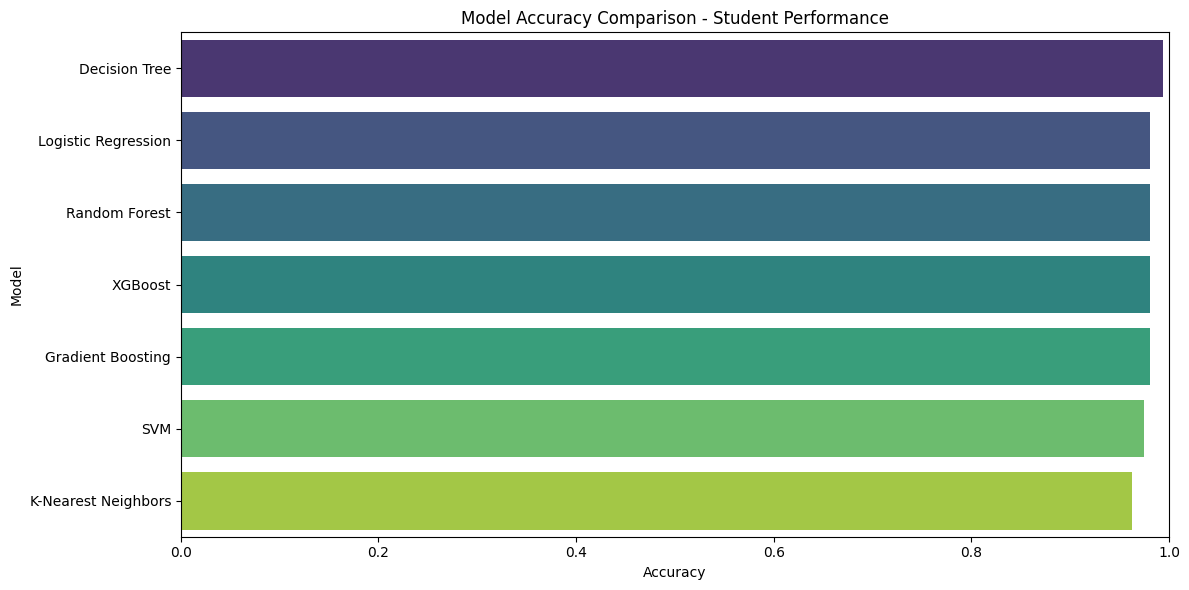

In [10]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results.keys()]
}).sort_values('Accuracy', ascending=False)

print("Model Performance Comparison:")
print(comparison_df)

# Visualize model comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df, x='Accuracy', y='Model', palette='viridis')
plt.title('Model Accuracy Comparison - Student Performance')
plt.xlim(0, 1)
plt.xlabel('Accuracy')
plt.tight_layout()
plt.show()

Best Model: Decision Tree
Validation Accuracy: 0.9938

Classification Report:
              precision    recall  f1-score   support

        Fail       0.89      1.00      0.94         8
        Pass       1.00      0.99      1.00       152

    accuracy                           0.99       160
   macro avg       0.94      1.00      0.97       160
weighted avg       0.99      0.99      0.99       160



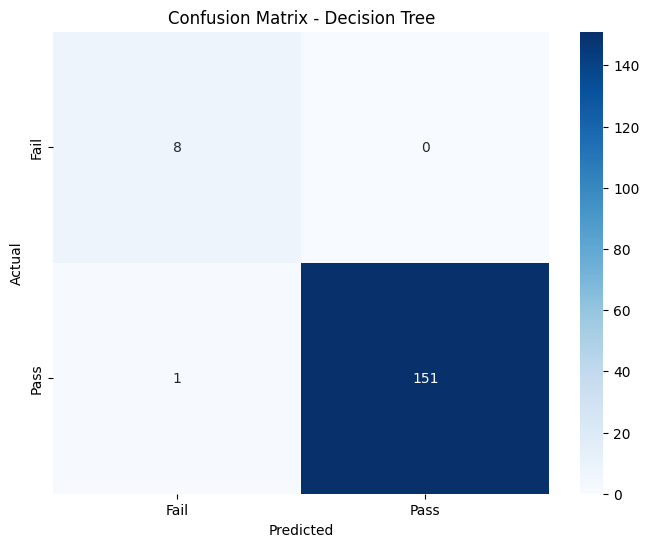

In [11]:
# Get the best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']

print(f"Best Model: {best_model_name}")
print(f"Validation Accuracy: {results[best_model_name]['accuracy']:.4f}")

# Detailed evaluation
print("\nClassification Report:")
print(classification_report(y_val, best_predictions, target_names=['Fail', 'Pass']))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_val, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Pass'],
            yticklabels=['Fail', 'Pass'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Decision Tree - Cross-validation scores: [1.      0.99375 1.      0.99375 1.     ]
Decision Tree - Mean CV Accuracy: 0.9975 (+/- 0.0061)

Logistic Regression - Cross-validation scores: [0.9875  0.975   0.9875  0.9875  0.98125]
Logistic Regression - Mean CV Accuracy: 0.9838 (+/- 0.0100)

Random Forest - Cross-validation scores: [1.      0.99375 1.      0.99375 1.     ]
Random Forest - Mean CV Accuracy: 0.9975 (+/- 0.0061)



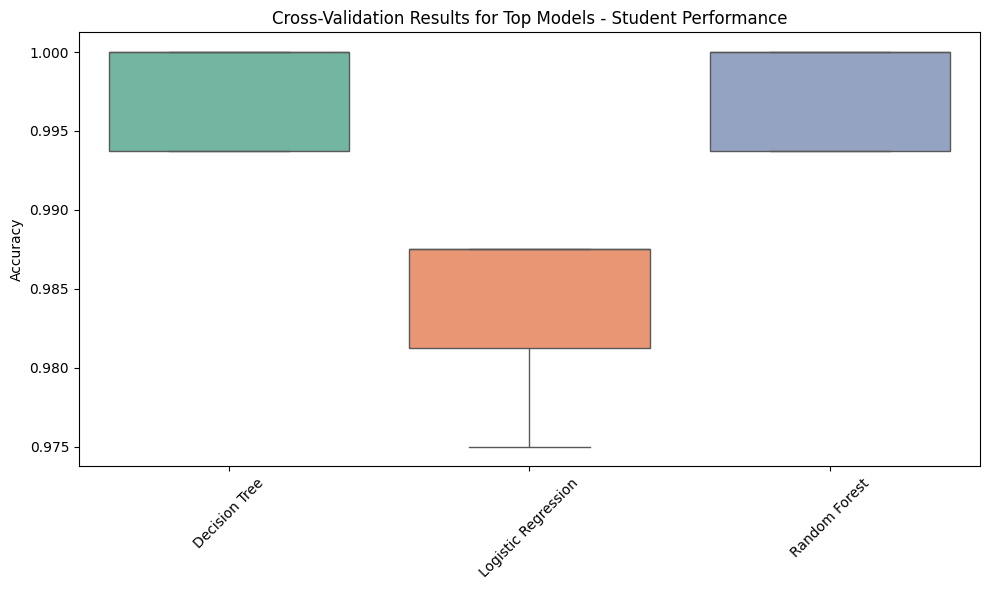

In [12]:
# Perform cross-validation on the best performing models
top_models = comparison_df.head(3)['Model'].tolist()
cv_results = {}

for model_name in top_models:
    model = models[model_name]

    if model_name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
        # Use scaled data
        cv_scores = cross_val_score(model, scaler.fit_transform(X), y, cv=5, scoring='accuracy')
    else:
        # Use unscaled data
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    cv_results[model_name] = cv_scores
    print(f"{model_name} - Cross-validation scores: {cv_scores}")
    print(f"{model_name} - Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})\n")

# Visualize cross-validation results
plt.figure(figsize=(10, 6))
cv_df = pd.DataFrame(cv_results)
sns.boxplot(data=cv_df, palette='Set2')
plt.title('Cross-Validation Results for Top Models - Student Performance')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Prepare test data for the best model
if best_model_name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
    test_scaled = scaler.transform(test_processed[feature_columns])
    test_predictions = best_model.predict(test_scaled)
else:
    test_predictions = best_model.predict(test_processed[feature_columns])

# Create submission file
submission = pd.DataFrame({
    'student_id': range(len(test_predictions)),
    'overall_pass': test_predictions
})

# Save submission file
submission.to_csv('student_performance_predictions.csv', index=False)
print("Submission file created successfully!")

# Display first few predictions
submission.head()

Submission file created successfully!


,student_id,overall_pass
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['student_id'].plot(kind='hist', bins=20, title='student_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='student_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['student_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'student_id'}, axis=1)
              .sort_values('student_id', ascending=True))
  xs = counted['student_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('student_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('student_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['overall_pass']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'overall_pass'}, axis=1)
              .sort_values('overall_pass', ascending=True))
  xs = counted['overall_pass']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('overall_pass', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('overall_pass')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['student_id'].plot(kind='line', figsize=(8, 4), title='student_id')
plt.gca().spines[['top', 'right']].set_visible(False)

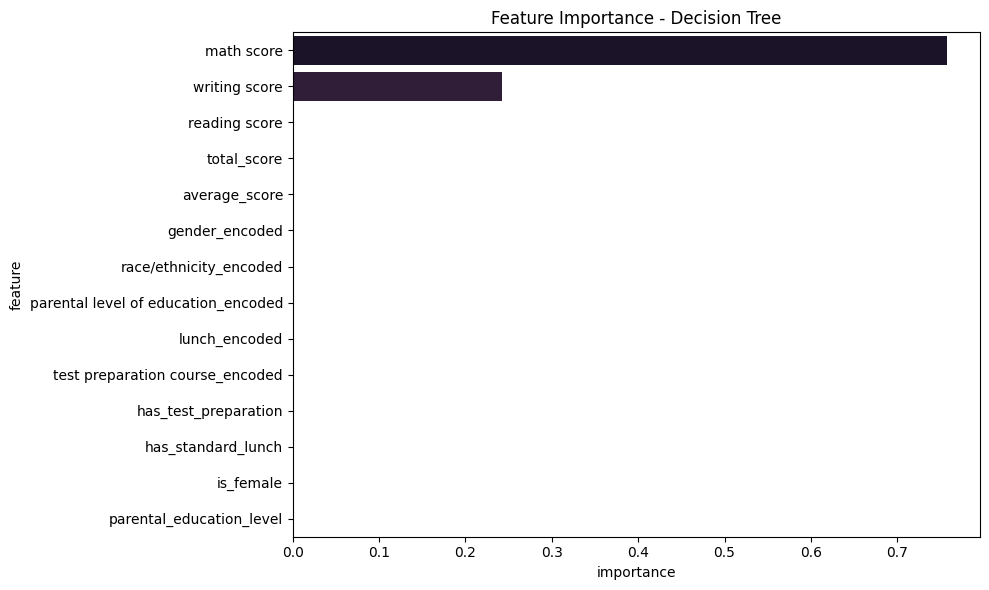

Feature Importance:
                                feature  importance
2                            math score    0.757969
1                         writing score    0.242031
0                         reading score    0.000000
3                           total_score    0.000000
4                         average_score    0.000000
5                        gender_encoded    0.000000
6                race/ethnicity_encoded    0.000000
7   parental level of education_encoded    0.000000
8                         lunch_encoded    0.000000
9       test preparation course_encoded    0.000000
10                 has_test_preparation    0.000000
11                   has_standard_lunch    0.000000
12                            is_female    0.000000
13             parental_education_level    0.000000


In [14]:
# Display feature importance for tree-based models
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature', palette='rocket')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()

    print("Feature Importance:")
    print(feature_importance)

In [15]:
print("="*50)
print("FINAL MODEL COMPARISON SUMMARY")
print("="*50)

for i, (model, accuracy) in enumerate(zip(comparison_df['Model'], comparison_df['Accuracy']), 1):
    print(f"{i}. {model}: {accuracy:.4f}")

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"📊 Validation Accuracy: {results[best_model_name]['accuracy']:.4f}")

# Additional metrics for the best model
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_val, best_predictions)
recall = recall_score(y_val, best_predictions)
f1 = f1_score(y_val, best_predictions)

print(f"🎯 Precision: {precision:.4f}")
print(f"🔍 Recall: {recall:.4f}")
print(f"⭐ F1-Score: {f1:.4f}")

FINAL MODEL COMPARISON SUMMARY
1. Decision Tree: 0.9938
2. Logistic Regression: 0.9812
3. Random Forest: 0.9812
4. XGBoost: 0.9812
5. Gradient Boosting: 0.9812
6. SVM: 0.9750
7. K-Nearest Neighbors: 0.9625

🏆 BEST MODEL: Decision Tree
📊 Validation Accuracy: 0.9938
🎯 Precision: 1.0000
🔍 Recall: 0.9934
⭐ F1-Score: 0.9967


In [16]:
# Save cleaned dataset
train_processed.to_csv('cleaned_student_dataset.csv', index=False)

# Download to your computer
files.download('cleaned_student_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>